<Axes: xlabel='prod', ylabel='Count'>

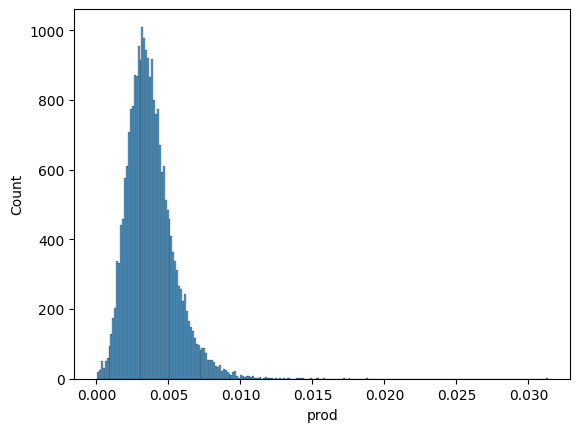

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


df = pd.read_excel('data.xlsx')

df["prod"] = (df["cnt_call"]+ df["cnt_chat"])/(df["dlg_time_call"] + df["dlg_time_chat"])


In [17]:
# Фильтруем данные только для Москвы (если нужно)
# Если хотите для всех городов, уберите эту строку
moscow_df = df[df["residential_city_nm"] == "г Москва"].copy()

# Группируем данные по employee_id и вычисляем средние значения
employee_stats = moscow_df.agg({
    'prod': 'median',
    'skill_group_exp': 'median'
}).reset_index()
print(employee_stats)
# Создаем график
plt.figure(figsize=(12, 8))

# Scatter plot с регрессионной линией
sns.regplot(
    data=employee_stats,
    x='skill_group_exp',
    y='prod',
    scatter_kws={
        "alpha": 0.7,
        "s": 80,
        "color": "steelblue"
    },
    line_kws={
        "color": "crimson",
        "lw": 2
    }
)

# Улучшаем внешний вид графика
plt.title('Зависимость продуктивности от опыта в группе навыков', fontsize=16, pad=20)
plt.ylabel('Медианная продуктивность', fontsize=14)
plt.xlabel('Медианный опыт в группе навыков', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Добавляем аннотацию с коэффициентом корреляции
correlation = employee_stats['prod'].corr(employee_stats['skill_group_exp'])
plt.annotate(
    f"Корреляция: {correlation:.3f}",
    xy=(0.05, 0.95),
    xycoords="axes fraction",
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.8)
)

# Добавляем информацию о количестве сотрудников
plt.annotate(
    f"Количество сотрудников: {len(employee_stats)}",
    xy=(0.05, 0.89),
    xycoords="axes fraction",
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.8)
)

# Настраиваем стиль
sns.despine()
plt.tight_layout()
plt.show()

# Дополнительно: выводим статистику
print(f"Количество сотрудников: {len(employee_stats)}")
print(f"Корреляция между продуктивностью и опытом в группе навыков: {correlation:.3f}")
print("\nСтатистика по продуктивности:")
print(employee_stats['prod'].describe())
print("\nСтатистика по опыту в группе навыков:")
print(employee_stats['skill_group_exp'].describe())


             index         0
0             prod  0.003226
1  skill_group_exp  5.000000


KeyError: 'skill_group_exp'

<Figure size 1200x800 with 0 Axes>